In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import operator
from matplotlib import pyplot as plt
from repositories.CorpusRepository import *
from repositories.TokenRepository import *
from repositories.EstadisticasRepository import *

path = '/Users/macbookpro/code/RI-Tratamiento-y-Analisis-del-Texto/demo-data'
corpusRepository = CorpusRepository(path)
tokenRepository = TokenRepository()
pathVacias = None

documentos = corpusRepository.getListDocuments()


### Gráfica 

Creamos la gráfica que represente los puntos correspondiente a los pares [terminos_procesados,terminos_unicos]

100% ▏██████████████████████████████████████████████████▕



Text(0,0.5,u'#T\xe9rminos \xdanicos')

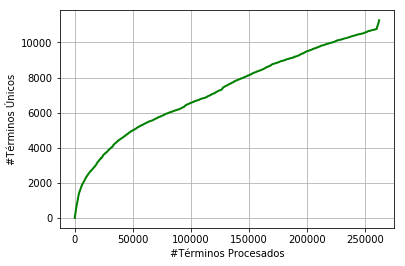

In [2]:
response = tokenRepository.tokenizar(documentos,pathVacias = pathVacias)
figura, grafico = plt.subplots()
grafico.plot(response['terminos_procesados'], response['terminos_unicos'], color="g", linewidth=2)
grafico.grid(True)
grafico.set_xlabel(u"#Términos Procesados")
grafico.set_ylabel(u"#Términos Únicos")


#### Función estimación de Heaps

Obtiene los valores de la estimación de Heaps para los terminos procesados. Depende de los parametros K y B definidos en la teória

In [3]:
# Estimación de HEAPS
def estimacionHeaps(terminos_procesados, param_k, param_b):
    terminos_unicos = []
    for cantidad_procesada in terminos_procesados:
        terminos_unicos.append(param_k * pow(cantidad_procesada, param_b))
    return terminos_unicos



#### Gráfica de predicciones

Gráfica cada predicción obteniendo los valores de la función estimacionHeaps()

In [4]:
# Predicciones de HEAPS
def graficar_predicciones_heaps(lista_predicciones, terminos_procesados, terminos_unicos, colores):
    figura, grafico = plt.subplots()
    for indice, prediccion in enumerate(lista_predicciones):
        grafico.plot(terminos_procesados, prediccion[2], color=colores[indice], linewidth=2, linestyle="--",
                     label="k: "+str(prediccion[0])+" | b: "+str(prediccion[1]))
    grafico.plot(terminos_procesados, terminos_unicos, color="b", linewidth=2, label="Real")
    grafico.legend(loc="upper left")
    grafico.grid(True)
    grafico.set_xlabel(u"#Términos Procesados")
    grafico.set_ylabel(u"#Términos Únicos")

#### Lógica

1. Por cada parametro K obtenemos la lista de predicciones de Heaps por cada parametro de B
2. Graficamos los valores obtenidos

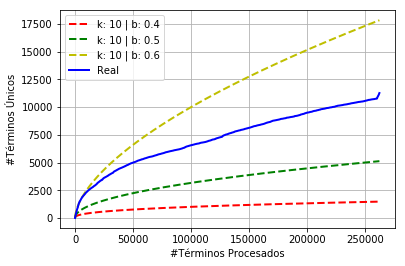

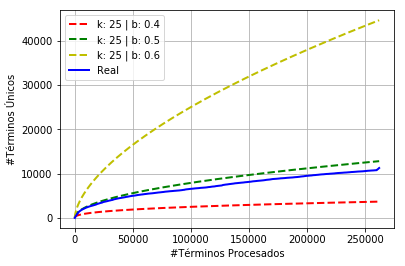

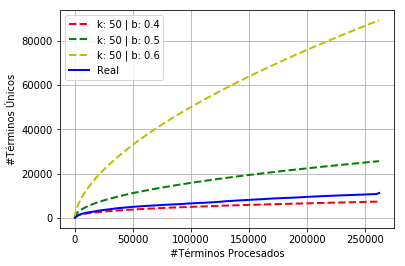

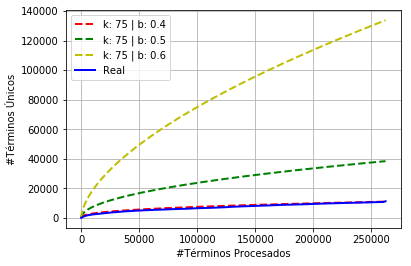

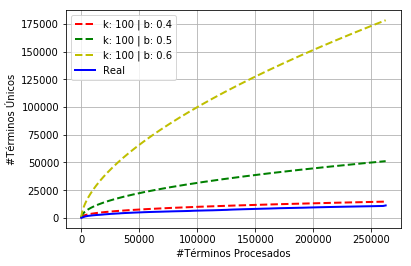

In [5]:
params_k = [10, 25, 50, 75, 100]
params_b = [0.4, 0.5, 0.6]

colores = ["r","g","y"]

for param_k in params_k:
    lista_predicciones_heaps = []
    for param_b in params_b:
        lista_predicciones_heaps.append([param_k, param_b, estimacionHeaps(response['terminos_procesados'], param_k, param_b)])
    graficar_predicciones_heaps(lista_predicciones_heaps, response['terminos_procesados'], response['terminos_unicos'], colores)

### Conclusión

Observando todas las estimaciones graficadas, la que mas se asemeja a los datos obtenidos del análisis es la que tiene como parámetros k = 75 y b = 0,4